# Gemstone Price Prediction

The project aims to predict the prices of gemstones giving certain variables such as carat, cut, color, clarity, and dimension. It involves the use of supervised machine learning regression algorithms. The processes in this project are outlined below:

1. Import Data and Data Summary


2. Data Cleaning
    - Dealing with missing value
    - Dealing with zeros
    - Dealing with duplicates
    - Handling outliers


3. Data Exploration
    - Univariate Analysis
    - Bivariate Analysis


4. Data Pre-processing
    - Ordinal Encoding
    - Train, Validation, Test Splitting
    - Feature Scaling


5. Model Training and Validation
    - Linear Regression
    - Polynomial Regression
    - Support Vector Regressor
    - Decision Tree Regressor
    - Random Forest Regressor
    - XGBoost Regressor


6. Model Selection


7. Final Model Testing

#### Description of Variables

- Price: The price of the gemstone
- Carat: The carat weight of the gemstone 
- Cut: The cut quality of the gemstome
- Color: The color of the gemstome. D is the best and J the worst
- Clarity: The absence of blemishes in the order FL (best), IF, VVS1, VVS2, VS1, VS2, SI1, SI2,I1, I2, I3 (worst)
- Depth: The height of the gemstone measured from the culet to the table, divided by its average girgle diameter
- Table: The width of the gemstone expressed as a percentage of its average diameter
- X: The length of the gemstone in mm
- Y: The width of the gemstone in mm
- Z: The height of the gemstone in mm

The data can be obtained on Kaggle at https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv

##### Import Libraries, Import Data, Data Summary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('cubic_zirconia.csv')

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [7]:
# Unnamed column appears to be an index column.

df.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
df.shape

(26967, 10)

## Data Cleaning
In cleaning the data, I will be dealing with the null values, the zero values, removing duplicates, and handling outliers

### Dealing with Null Values

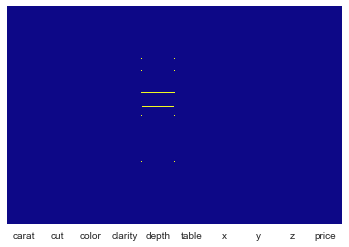

In [9]:
# Check for missing data using heatmap

sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='plasma')

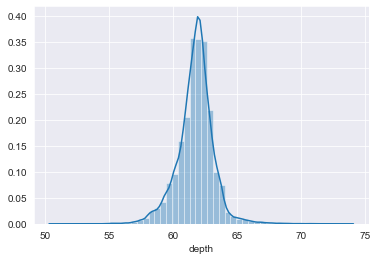

In [9]:
# There are null vlaues in depth column. Explore the distribution of depth

sns.distplot(df['depth'])

In [10]:
# Replace missing values in depth with the mean (depth is normally distributed)

df['depth'].fillna(df['depth'].mean(),inplace=True)

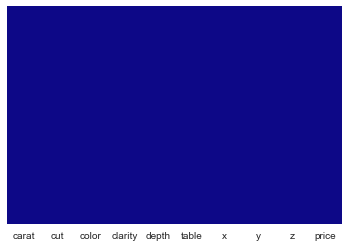

In [12]:
# Confirm that there are no more missing values

sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='plasma')

### Dealing with Zero Values

In [11]:
# Looking at the minimum values in the data description, there are 0s in columns x, y, and z. These are error values
# as it is not possible to have gemstone with no dimensions

for i in ['x','y','z']:
    print(f"Count of zeros in {i}: {df[df[i]==0][i].count()}")

Count of zeros in x: 3
Count of zeros in y: 3
Count of zeros in z: 9


In [12]:
# Drop rows with zeros

df.drop(df[df.x==0].index,inplace=True)
df.drop(df[df.y==0].index,inplace=True)
df.drop(df[df.z==0].index,inplace=True)

### Dealing with Duplicates

In [13]:
# Check if there are duplicates

print(f"Count of Duplicates: {df[df.duplicated()].count()[0]}")

Count of Duplicates: 33


In [14]:
# Drop dupicates

df.drop_duplicates(inplace = True)

In [15]:
df.shape

(26925, 10)

### Handling Outliers

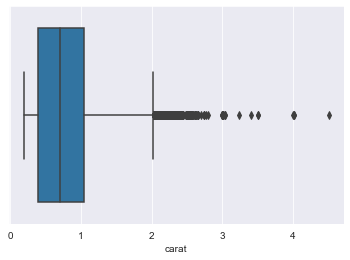

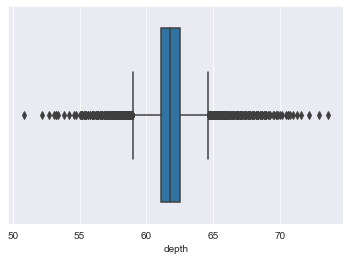

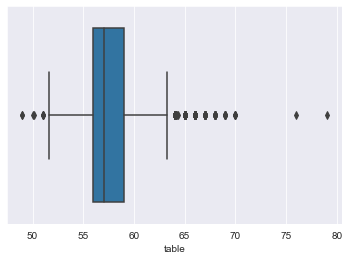

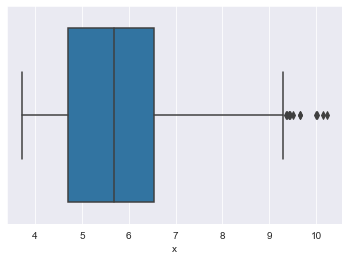

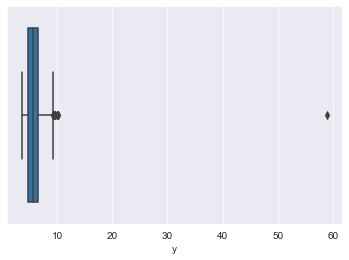

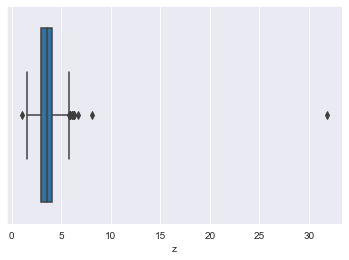

In [16]:
# Explore the distribution of the numerical independent variables

for i in ['carat','depth','table','x','y','z']:
    plt.figure()
    sns.boxplot(data=df,x=i)


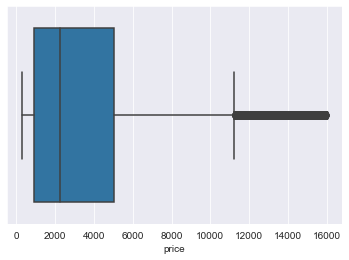

In [22]:
# Explore the distribution of the dependent variable - Price

sns.boxplot(data=df,x='price')

In [18]:
# Remove outlier using the z score as the cutoff. 
# Remove values above or below 3 times the standard deviation from the mean

def remove_outliers(col):
    cut_off = np.std(col) *3
    lower_range = np.mean(col) - cut_off
    upper_range = np.mean(col) + cut_off
    return lower_range, upper_range

In [19]:

for i in ['price','carat','depth','table','x','y','z']:
    
    lower_range, upper_range = remove_outliers(df[i])
    df = df[(df[i]>=lower_range) & (df[i]<=upper_range)]    

In [20]:
df.shape

(25541, 10)

In [ ]:
# Now explore the distribution of the independent variables after removing the outliers

for i in ['carat','depth','table','x','y','z']:
    plt.figure()
    sns.boxplot(df[i])

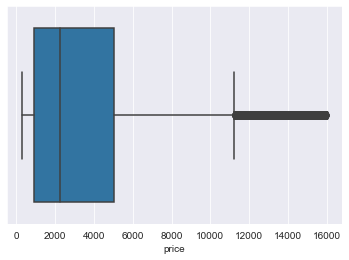

In [24]:
# Also, explore the distribution of the dependent variable (Price) after removing outliers

sns.boxplot(data=df,x='price')

## Data Exploration
This will involve a univariate analysis of all variable and a bivariate analysis between each variable and between each independent variable and the price

#### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243FBA79F10>,
      dtype=object)

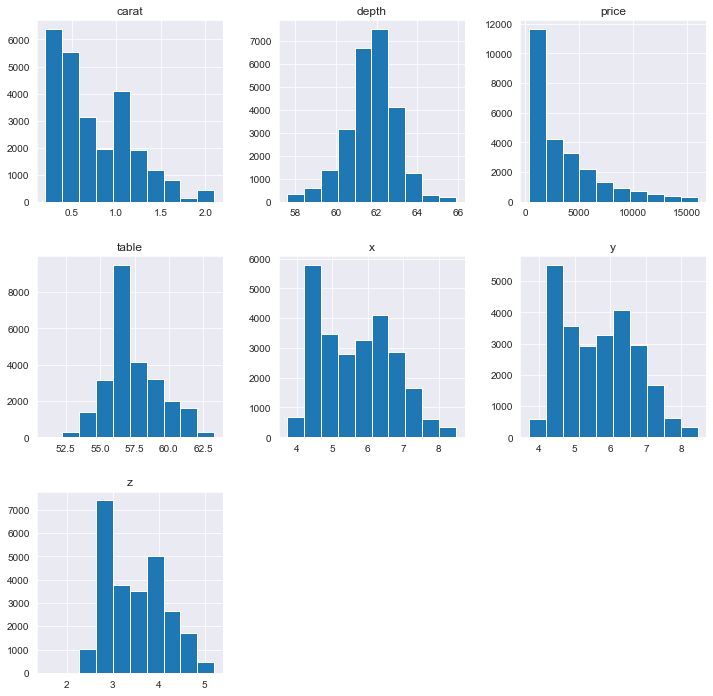

In [23]:
df.hist(figsize=(12,12))

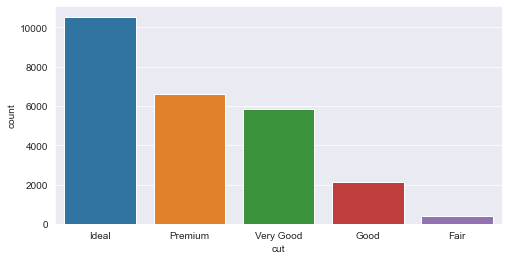

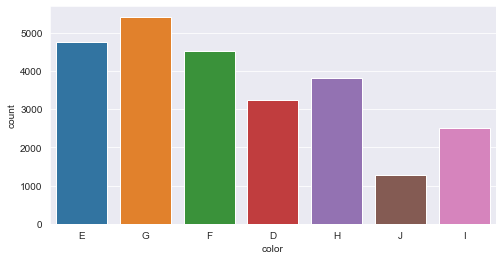

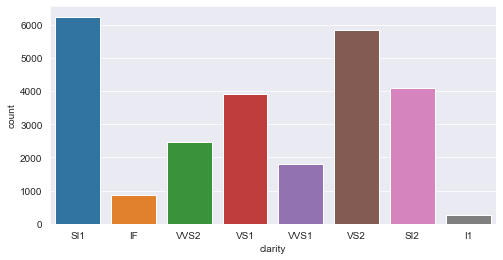

In [24]:
# Exploring the categorical variables

for i in ['cut','color','clarity']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=i)

#### Bivariate Analysis

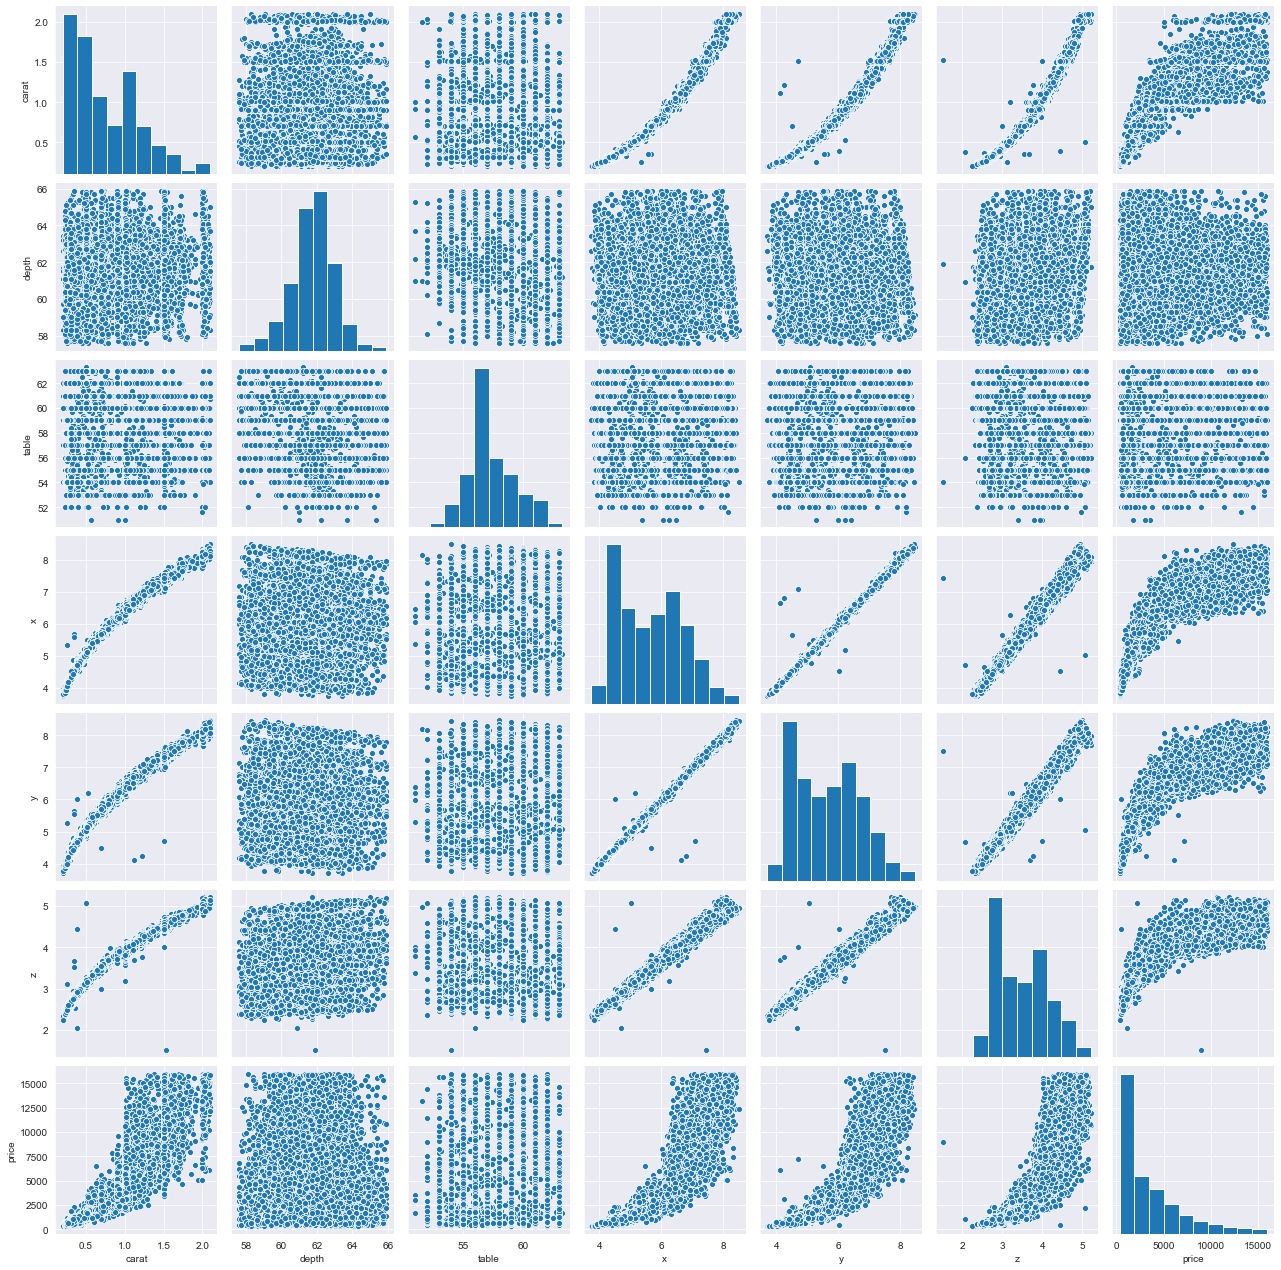

In [25]:
sns.pairplot(df)

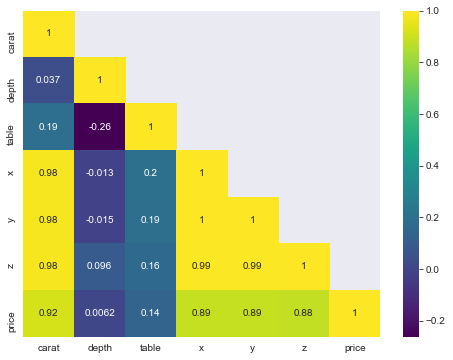

In [26]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis',mask=np.triu(df.corr(),+1))

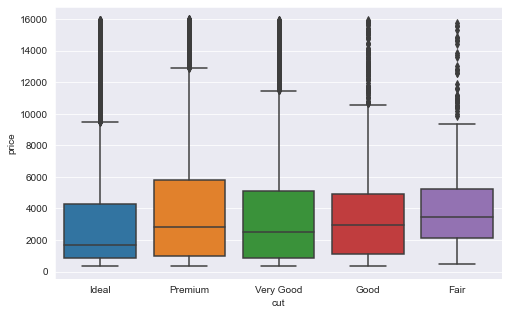

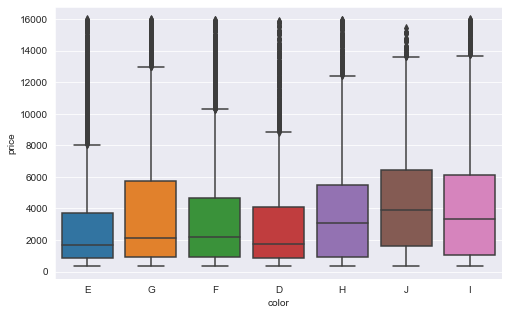

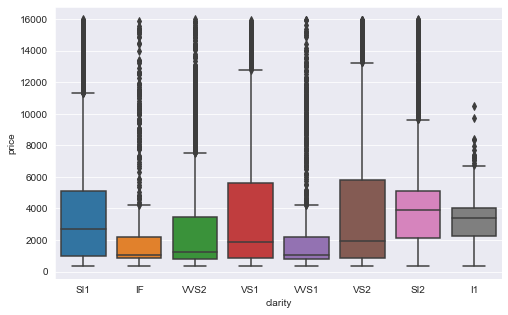

In [27]:
# Relationship between the categorical variable and price

for i in ['cut','color','clarity']:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, y='price', x=i)

## Data Pre-processing
This will involves encoding the categorical variables and feature scaling

### Encoding Categorical Variables

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
oe = OrdinalEncoder(categories=[['J','I','H','G','F','E','D'],['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
                               ['Fair','Good','Very Good','Premium','Ideal']])

In [27]:
df[['color','clarity','cut']] = oe.fit_transform(df[['color','clarity','cut']])

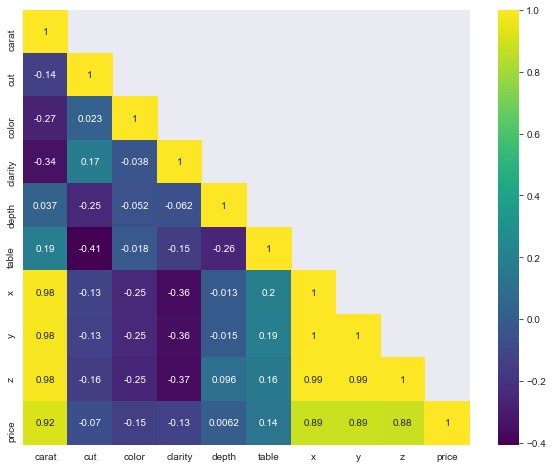

In [28]:
# Explore correlation of encoded categorical variable with the other variables

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',mask=np.triu(df.corr(),+1))


### Split Dataset into Training, Validation, and Testing set (70:18:12)
The training set will be 70% of the entire dataset. The Validation set will be 18%, and the final test set will be 12% of the entire dataset

In [29]:
X = df.drop('price',axis=1)

In [30]:
y = df['price']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# First split the data into Training and Test sets in ratio 70:30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
# Then split the test set (30%) into Validation and Test sets in ratio 60:40

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4)

### Feature Scaling
I need to scale the data as I will be using a Support Vector Regression algorithm, which works well only with scaled data

In [34]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_train_scaled = sc_x.fit_transform(X_train)
X_val_scaled = sc_x.fit_transform(X_val)
X_test_scaled = sc_x.fit_transform(X_test)

y_train_scaled = sc_y.fit_transform(pd.DataFrame(y_train)).flatten()
y_val_scaled = sc_y.fit_transform(pd.DataFrame(y_val)).flatten()
y_test_scaled = sc_y.fit_transform(pd.DataFrame(y_test)).flatten()

## Models Training and Validation
The models used for the projects are Linear Regression, Polynomial Regression, Support Vector Regression, Data Tree Regressor, Random Forest Regressor, and XGBoost Regressor

### Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
lr.intercept_

-2394.9979643106994

In [40]:
lr_coef = pd.DataFrame(lr.coef_,X.columns,['Coeff'])
lr_coef

,Coeff
carat,12070.954149
cut,102.045431
color,305.675918
clarity,448.379396
depth,57.928518
table,-23.576929
x,-1702.386811
y,1720.603746
z,-2360.722394


In [41]:
lr_pred = lr.predict(X_val)
LR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":lr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

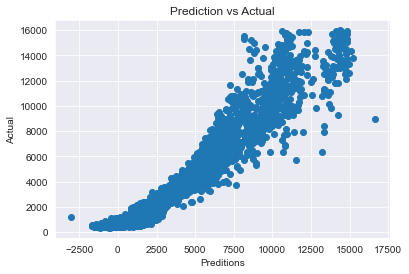

In [42]:
plt.scatter(lr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

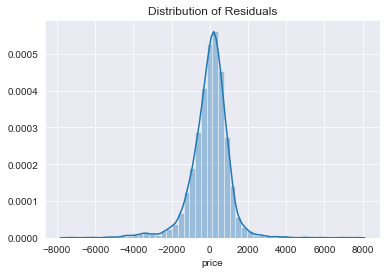

In [43]:
sns.distplot(lr_pred-y_val)
plt.title('Distribution of Residuals')

In [51]:
from sklearn import metrics
lr_R2S = metrics.r2_score(lr_pred,y_val)
lr_MAE = metrics.mean_absolute_error(lr_pred,y_val)
lr_RMSE = np.sqrt(metrics.mean_squared_error(lr_pred,y_val))

print('R-squared: ', lr_R2S)
print('Mean Absolute Error: ', lr_MAE)
print('Root Mean Square Error: ', lr_RMSE)

R-squared:  0.9073188133434098
Mean Absolute Error:  696.0733955524973
Root Mean Square Error:  1013.412299348446


### Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures()
X_poly = poly_reg.fit_transform(X_train)

In [46]:
pr = LinearRegression()
pr.fit(X_poly,y_train)

LinearRegression()

In [47]:
pr_pred = pr.predict(poly_reg.fit_transform(X_val))
PR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":pr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

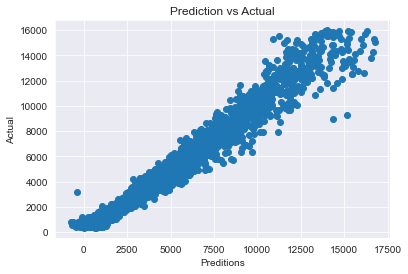

In [48]:
plt.scatter(pr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

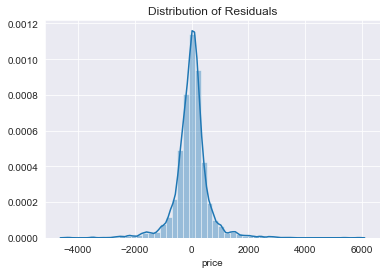

In [49]:
sns.distplot(pr_pred-y_val)
plt.title('Distribution of Residuals')

In [52]:
pr_R2S = metrics.r2_score(pr_pred,y_val)
pr_MAE = metrics.mean_absolute_error(pr_pred,y_val)
pr_RMSE = np.sqrt(metrics.mean_squared_error(pr_pred,y_val))

print('R-squared: ', pr_R2S)
print('Mean Absolute Error: ', pr_MAE)
print('Root Mean Square Error: ', pr_RMSE)

R-squared:  0.9695817408272216
Mean Absolute Error:  381.19923522471805
Root Mean Square Error:  596.5312640513187


### Support Vector Regressor

In [53]:
from sklearn.svm import SVR
svr = SVR()

In [54]:
svr.fit(X_train_scaled,y_train_scaled)

SVR()

In [55]:
svr_pred_scaled = svr.predict(X_val_scaled)
svr_pred = sc_y.inverse_transform(svr_pred_scaled)
SVR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":svr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

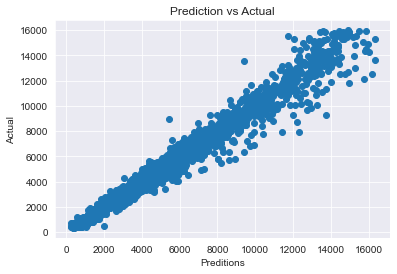

In [56]:
plt.scatter(svr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

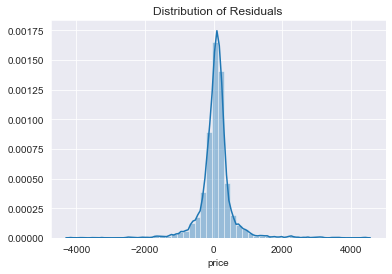

In [57]:
sns.distplot(svr_pred-y_val)
plt.title('Distribution of Residuals')

In [58]:
svr_R2S = metrics.r2_score(svr_pred,y_val)
svr_MAE = metrics.mean_absolute_error(svr_pred,y_val)
svr_RMSE = np.sqrt(metrics.mean_squared_error(svr_pred,y_val))

print('R-squared: ', svr_R2S)
print('Mean Absolute Error: ', svr_MAE)
print('Root Mean Square Error: ', svr_RMSE)

R-squared:  0.9798027855288896
Mean Absolute Error:  291.2063670808269
Root Mean Square Error:  487.6991490579682


### Decision Tree Regressor

In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [60]:
dtr_pred = dtr.predict(X_val)
DTR_model = pd.DataFrame({"True Values":y_val, "Predicted Values":dtr_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

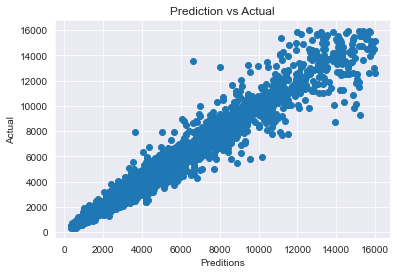

In [61]:
plt.scatter(dtr_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

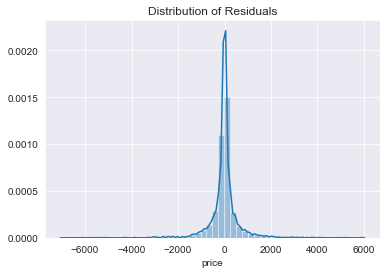

In [62]:
sns.distplot(dtr_pred-y_val)
plt.title('Distribution of Residuals')

In [63]:
dtr_R2S = metrics.r2_score(dtr_pred,y_val)
dtr_MAE = metrics.mean_absolute_error(dtr_pred,y_val)
dtr_RMSE = np.sqrt(metrics.mean_squared_error(dtr_pred,y_val))

print('R-squared: ', dtr_R2S)
print('Mean Absolute Error: ', dtr_MAE)
print('Root Mean Square Error: ', dtr_RMSE)

R-squared:  0.967171703068839
Mean Absolute Error:  324.60463345660213
Root Mean Square Error:  627.8102012059916


### Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor()
ran.fit(X_train,y_train)

RandomForestRegressor()

In [65]:
ran_pred = ran.predict(X_val)
RAN_model = pd.DataFrame({"True Values":y_val, "Predicted Values":ran_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

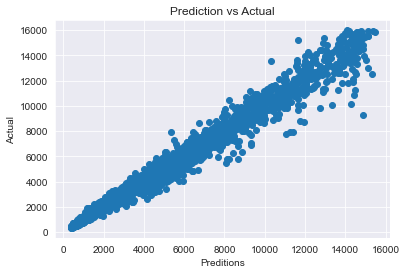

In [66]:
plt.scatter(ran_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

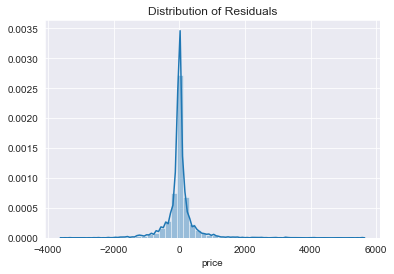

In [67]:
sns.distplot(ran_pred-y_val)
plt.title('Distribution of Residuals')

In [68]:
ran_R2S = metrics.r2_score(ran_pred,y_val)
ran_MAE = metrics.mean_absolute_error(ran_pred,y_val)
ran_RMSE = np.sqrt(metrics.mean_squared_error(ran_pred,y_val))

print('R-squared: ', ran_R2S)
print('Mean Absolute Error: ', ran_MAE)
print('Root Mean Square Error: ', ran_RMSE)

R-squared:  0.9831000636883447
Mean Absolute Error:  234.13623076644188
Root Mean Square Error:  447.5842879935894


### XGBoost Regressor

In [69]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
xgb_pred = xgb.predict(X_val)
XGB_model = pd.DataFrame({"True Values":y_val, "Predicted Values":xgb_pred})

Text(0.5, 1.0, 'Prediction vs Actual')

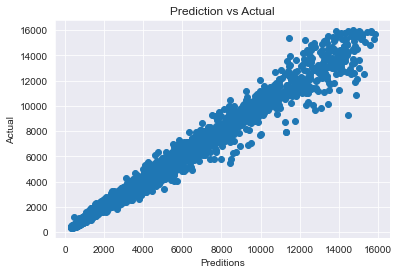

In [71]:
plt.scatter(xgb_pred,y_val)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

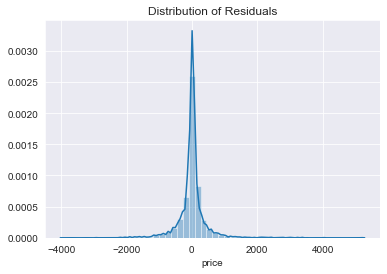

In [72]:
sns.distplot(xgb_pred-y_val)
plt.title('Distribution of Residuals')

In [73]:
xgb_R2S = metrics.r2_score(xgb_pred,y_val)
xgb_MAE = metrics.mean_absolute_error(xgb_pred,y_val)
xgb_RMSE = np.sqrt(metrics.mean_squared_error(xgb_pred,y_val))

print('R-squared: ', xgb_R2S)
print('Mean Absolute Error: ', xgb_MAE)
print('Root Mean Square Error: ', xgb_RMSE)

R-squared:  0.9833869090981627
Mean Absolute Error:  234.81694871538588
Root Mean Square Error:  444.66365272823396


## Model Comparison and Selection

The aim of model comparison is to see the best performing model of all six regression models above. The best performing model will become my chosen model for the price prediction
I will evaluate the final performance of my chosen model on the Test dataset


In [90]:
# Place the predicted values of all models side by side along with the true values

all_models = pd.DataFrame({"True Values":y_val,"LR Model":lr_pred,"PR Model":pr_pred,"SVR Model":svr_pred,
                           "DTR Model":dtr_pred,"RAN Model":ran_pred,"XGB Model":xgb_pred})
all_models

,True Values,LR Model,PR Model,SVR Model,DTR Model,RAN Model,XGB Model
4965,4068,4715.543827,4355.512879,4192.084390,4211.0,4317.18,4248.619141
7730,1020,1984.781624,1330.262289,1090.734880,954.0,979.10,1020.514404
7858,3464,3726.388236,3610.982662,3265.838337,3016.0,3198.70,3165.749268
8364,1385,1058.816879,1424.783618,1434.708697,1074.0,1369.14,1396.260864
5333,3879,4160.080075,4038.278423,3840.908800,3537.0,3515.40,3489.158203
...,...,...,...,...,...,...,...
9824,698,-27.812474,421.653021,558.054652,693.0,648.56,751.333923
20845,928,637.152250,760.850831,842.010242,956.0,921.76,859.865967
26122,2753,3922.125625,3151.522704,3012.387895,2598.0,2807.49,2956.178955
20979,7822,8634.993854,6903.206005,6920.015332,7314.0,7008.75,7311.103027


In [91]:
# Compare the residual values of all models side by side along with the true values

for i in ['LR Model','PR Model','SVR Model','DTR Model','RAN Model','XGB Model']:
    all_models[i] = all_models[i] - all_models['True Values']

all_models.columns = ['True Values','LR Residual','PR Residual','SVR Residual','DTR Residual','RAN Residual','XGB Residual']
all_models

,True Values,LR Residual,PR Residual,SVR Residual,DTR Residual,RAN Residual,XGB Residual
4965,4068,647.543827,287.512879,124.084390,143.0,249.18,180.619141
7730,1020,964.781624,310.262289,70.734880,-66.0,-40.90,0.514404
7858,3464,262.388236,146.982662,-198.161663,-448.0,-265.30,-298.250732
8364,1385,-326.183121,39.783618,49.708697,-311.0,-15.86,11.260864
5333,3879,281.080075,159.278423,-38.091200,-342.0,-363.60,-389.841797
...,...,...,...,...,...,...,...
9824,698,-725.812474,-276.346979,-139.945348,-5.0,-49.44,53.333923
20845,928,-290.847750,-167.149169,-85.989758,28.0,-6.24,-68.134033
26122,2753,1169.125625,398.522704,259.387895,-155.0,54.49,203.178955
20979,7822,812.993854,-918.793995,-901.984668,-508.0,-813.25,-510.896973


Text(0.5, 1.0, 'XGBoost Regressor')

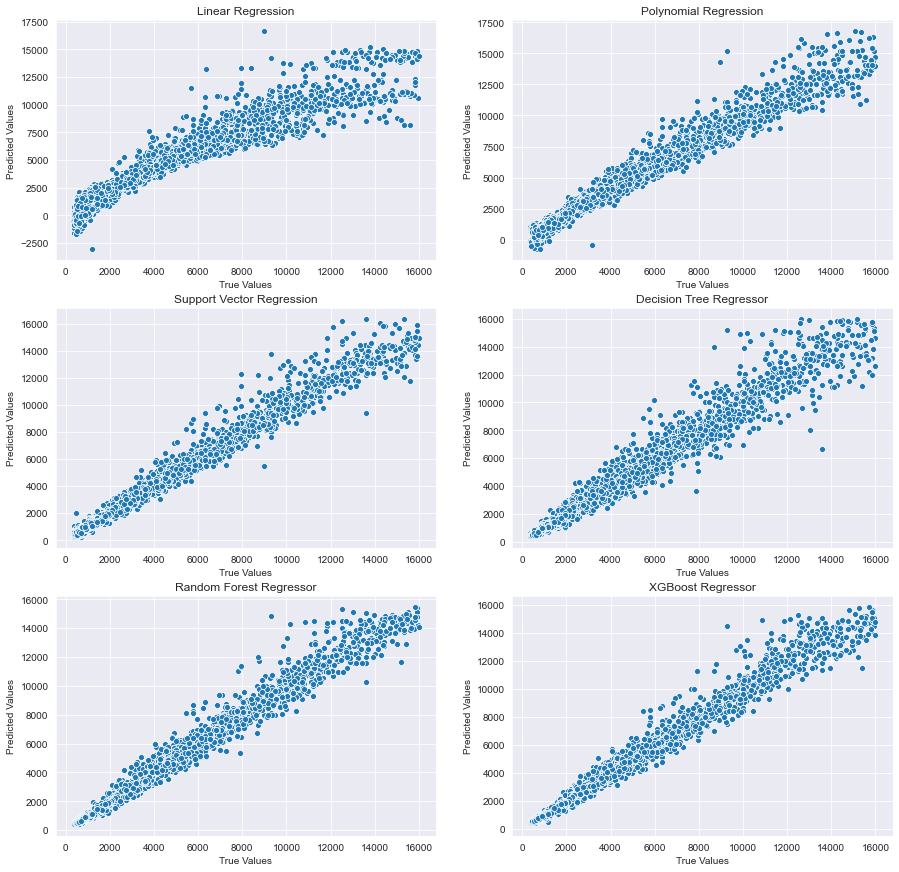

In [74]:
fig , axes= plt.subplots(3, 2, figsize=(15,15))

sns.scatterplot(ax=axes[0,0], data=LR_model, x="True Values", y="Predicted Values").set_title("Linear Regression")
sns.scatterplot(ax=axes[0,1], data=PR_model, x="True Values", y="Predicted Values").set_title("Polynomial Regression")
sns.scatterplot(ax=axes[1,0], data=SVR_model, x="True Values", y="Predicted Values").set_title("Support Vector Regression")
sns.scatterplot(ax=axes[1,1], data=DTR_model, x="True Values", y="Predicted Values").set_title("Decision Tree Regressor")
sns.scatterplot(ax=axes[2,0], data=RAN_model, x="True Values", y="Predicted Values").set_title("Random Forest Regressor")
sns.scatterplot(ax=axes[2,1], data=XGB_model, x="True Values", y="Predicted Values").set_title("XGBoost Regressor")


##### XGBoost Regressor  appears to have the most straight line. A more straight a line is along the diagonal, the closer the Predicted values and True values are


In [75]:
# Compare the performance of the models using the R-squared, Mean Absolute Error, and Root Mean Square Error

models = pd.DataFrame(data= {"LR":[lr_R2S, lr_MAE , lr_RMSE], "PR":[pr_R2S, pr_MAE , pr_RMSE], 
                       "SVR":[svr_R2S, svr_MAE , svr_RMSE], "DTR":[dtr_R2S, dtr_MAE , dtr_RMSE], 
                       "RAN":[ran_R2S, ran_MAE , ran_RMSE], "XGB":[xgb_R2S, xgb_MAE , xgb_RMSE]},
                      index = ['R Squared', 'Mean Absolute Error', 'Root Mean Squared Error'])
models

,LR,PR,SVR,DTR,RAN,XGB
R Squared,0.907319,0.969582,0.979803,0.967172,0.983100,0.983387
Mean Absolute Error,696.073396,381.199235,291.206367,324.604633,234.136231,234.816949
Root Mean Squared Error,1013.412299,596.531264,487.699149,627.810201,447.584288,444.663653


##### XGBoost Regressor is the best performing model using the R-squared score, and Root Mean Square Error

#### XGBoost Regressor is my chosen model

## Final Model Testing
I am going to test the performance of the XGBoost Regressor in the Test dataset (unseen data)

In [76]:
xgb_test_pred = xgb.predict(X_test)
final_model_testing = pd.DataFrame({"True Values":y_test, "Predicted Values":xgb_test_pred})
final_model_testing

,True Values,Predicted Values
6722,3577,3565.996582
2101,537,575.177551
11460,4200,4161.390625
7209,695,738.367188
3482,1715,1566.907715
...,...,...
26229,928,859.223389
18033,5758,5110.959961
17968,4666,5748.926270
23635,2756,2929.167480


Text(0.5, 1.0, 'Prediction vs Actual')

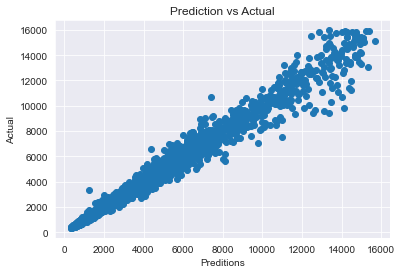

In [77]:
plt.scatter(xgb_test_pred ,y_test)
plt.xlabel('Preditions')
plt.ylabel('Actual')
plt.title('Prediction vs Actual')

Text(0.5, 1.0, 'Distribution of Residuals')

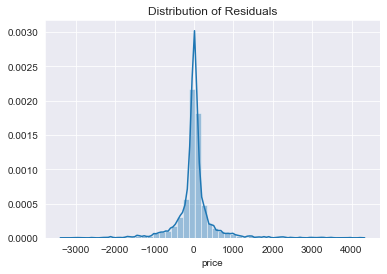

In [78]:
sns.distplot(xgb_test_pred-y_test)
plt.title('Distribution of Residuals')

In [79]:
final_model_R2S = metrics.r2_score(xgb_test_pred,y_test)
final_model_MAE = metrics.mean_absolute_error(xgb_test_pred,y_test)
final_model_RMSE = np.sqrt(metrics.mean_squared_error(xgb_test_pred,y_test))

final_model_performance = pd.DataFrame(data= {"Model Performance":[final_model_R2S, final_model_MAE , final_model_RMSE]}, 
                      index = ['R Squared', 'Mean Absolute Error', 'Root Mean Squared Error'])

final_model_performance

,Model Performance
R Squared,0.979853
Mean Absolute Error,255.025510
Root Mean Squared Error,481.948785


##### The selected model performed well on the test data with an R-squared of about 98%